In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

# 首先，我们将数据加载到Python中:

In [25]:
fake_path = '/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP数据集合/fake-news/data/Fake.csv'
true_path = '/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/NLP数据集合/fake-news/data/True.csv'

In [26]:
fake = pd.read_csv(fake_path)
true = pd.read_csv(true_path)

In [27]:
fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [28]:
true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


# 添加一个真假标签

In [29]:
fake['target'] = 'fake'
true['target'] = 'true'

# 数据合并

In [30]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [31]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# 对数据洗牌,并且重置索引

In [32]:
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,target
0,Watch Desperate Americans Literally BEG Justi...,As Canadian Prime Minister Justin Trudeau cont...,News,"March 18, 2016",fake
1,Trump offers to mediate talks on Qatar crisis,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"September 7, 2017",true
2,Congressional Black Caucus Member Depicts Lis...,A senior member of the Congressional Black Cau...,News,"September 22, 2016",fake
3,"EU's Tusk notes Brexit progress, hopes for tra...",BRUSSELS (Reuters) - EU Chairman Donald Tusk s...,worldnews,"October 20, 2017",true
4,U.S. Congress panel postpones work on Puerto R...,WASHINGTON (Reuters) - Legislation to help Pue...,politicsNews,"April 13, 2016",true


# 删除日期

In [33]:
data.drop(["date"],axis=1,inplace=True)

# 删除标题

In [34]:
data.drop(["title"],axis=1,inplace=True)

# 转换大小写

In [35]:
data['text'] = data['text'].apply(lambda x: x.lower())

# 删除标点符号

In [36]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
    
data['text'] = data['text'].apply(punctuation_removal)

# 删除停止词

In [37]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# 不同主题有多少偏文章

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


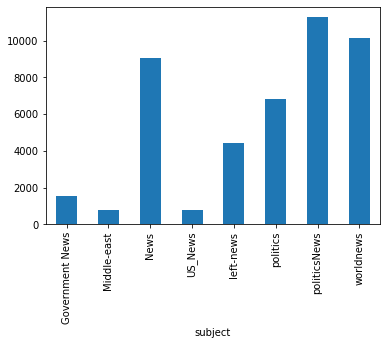

In [38]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

# 真假新闻各有多少篇

target
fake    23481
true    21417
Name: text, dtype: int64


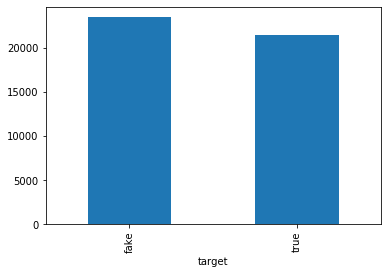

In [39]:
print(data.groupby(["target"])["text"].count())
data.groupby(["target"])["text"].count().plot(kind="bar")
plt.show()

# 假新闻的词云

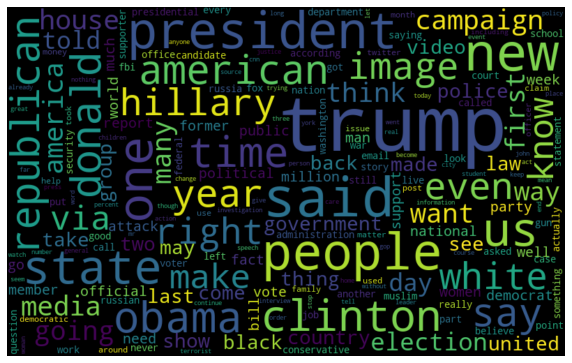

In [42]:
from wordcloud import WordCloud
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 真新闻的词云

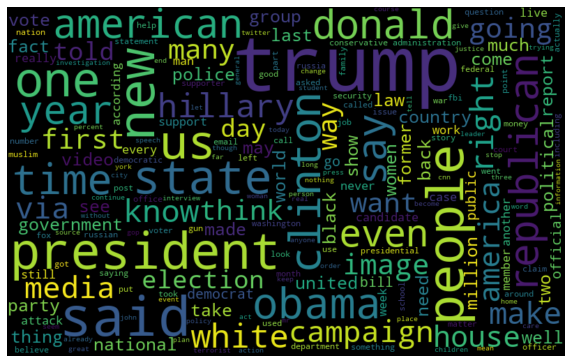

In [45]:
from wordcloud import WordCloud
real_data = data[data["target"] == "true"]
all_words = "".join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 词频统计函数

In [46]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

# 假新闻中出现频率最高的词汇

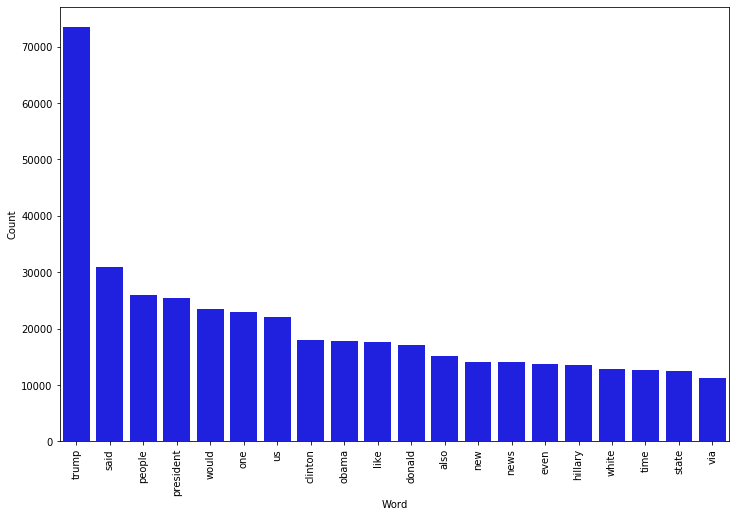

In [51]:
counter(data[data["target"] == "fake"], "text", 20)

# 真新闻中出现频率最高的词汇

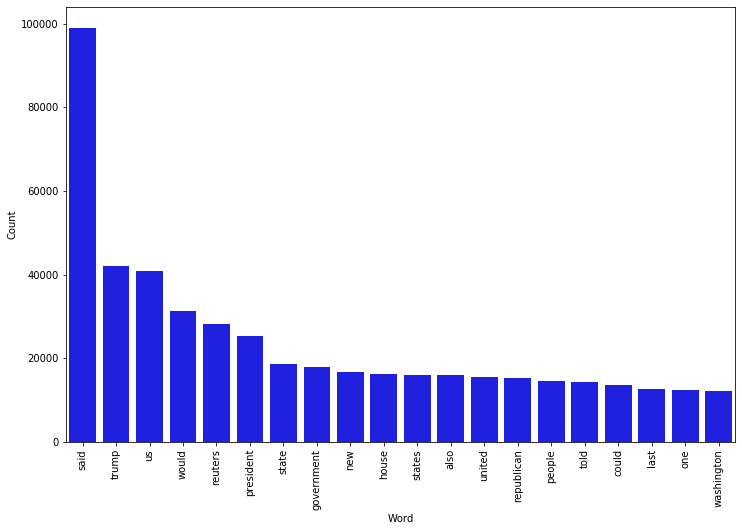

In [52]:
counter(data[data["target"] == "true"], "text", 20)

In [57]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 分割数据

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# 逻辑回归

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])# Fitting the model
model = pipe.fit(X_train, y_train)# Accuracy
prediction = model.predict(X_test)

accuracy: 98.79%


# 模型图

In [71]:
model

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,


# 测试集预测结果

In [72]:
prediction

array(['true', 'fake', 'fake', ..., 'true', 'fake', 'fake'], dtype=object)

# 准确率验证

In [70]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.79%


Confusion matrix, without normalization


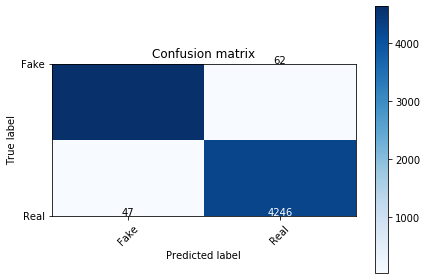

In [69]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# 决策树预测结果

In [73]:
from sklearn.tree import DecisionTreeClassifier# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.57%


In [74]:
prediction

array(['true', 'fake', 'fake', ..., 'true', 'fake', 'fake'], dtype=object)

Confusion matrix, without normalization


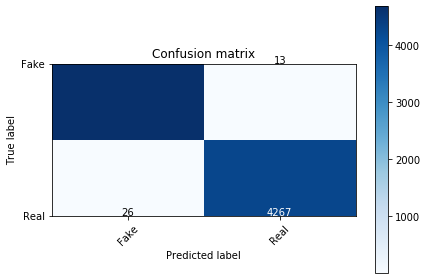

In [75]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# 随机森林

In [76]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)


In [77]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.02%
